In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ml_library import PolynomialRegression

In [2]:
df = pd.read_csv('./dataset/polynomial_regression_dataset.csv')
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
202,60,female,24.035,0,no,northwest,13012.20865
14,27,male,42.130,0,yes,southeast,39611.75770
156,48,male,24.420,0,yes,southeast,21223.67580
557,34,male,34.210,0,no,southeast,3935.17990
280,40,female,28.120,1,yes,northeast,22331.56680


In [3]:
df['sex'] = df['sex'].map({'male':0,'female':1})
df['smoker'] = df['smoker'].map({'no':0,'yes':1})
df['region'] = df['region'].map({'southwest':0,'southeast':1,'northwest':2,'northeast':3})

In [4]:
def z_score_normalization(df):
  mean = df.mean()
  std = df.std()
  df_norm = (df - mean)/std
  return df_norm

In [5]:
df_norm = z_score_normalization(df)

In [6]:
df_norm.sample(5)

,age,sex,bmi,children,smoker,region,charges
726,0.127614,-0.989221,-0.370339,-0.078738,-0.507273,0.466741,-0.545477
139,-1.224703,1.010141,0.875113,-0.908274,-0.507273,-1.343402,-0.916902
1022,0.554662,-0.989221,0.888232,-0.078738,1.969850,-0.438331,2.389817
1067,-0.014735,-0.989221,1.966421,-0.908274,-0.507273,1.371813,-0.620397
161,-1.509401,1.010141,1.014499,-0.908274,1.969850,-0.438331,1.889268


In [7]:
X = df_norm.drop('charges', axis=1)
Y = df_norm['charges']
X = np.array(X)
Y = np.array(Y)
X.shape, Y.shape

((1338, 6), (1338,))

In [8]:
model = PolynomialRegression(degree=3, alpha=0.01, epochs=100)
model.fit(X, Y)

Epoch 0: Cost 0.3822224626929428
Epoch 10: Cost 0.12998444225089872
Epoch 20: Cost 0.10320033872349918
Epoch 30: Cost 0.09402338349390439
Epoch 40: Cost 0.08951116801163014
Epoch 50: Cost 0.0867722797243398
Epoch 60: Cost 0.08488407659465771
Epoch 70: Cost 0.0834741970296825
Epoch 80: Cost 0.08236470461205994
Epoch 90: Cost 0.0814595277452662


(array([-5.16012203e-02,  4.86668157e-02,  2.81632128e-03,  1.67711803e-02,
         1.30339458e-02,  6.96999465e-02,  7.78203461e-03, -4.53564260e-03,
        -4.13936065e-03,  4.34572668e-03, -1.36992940e-02, -1.80094436e-02,
        -1.27552934e-02, -5.15037367e-02, -2.89223807e-03,  4.36455730e-03,
        -3.76395022e-03,  4.06600710e-03, -2.64826571e-02,  1.66096120e-03,
         8.15335451e-02,  1.27833660e-02, -2.72059874e-02, -1.33596828e-02,
         9.43788197e-03,  5.03788616e-02, -7.43563599e-03, -2.60532337e-02,
         6.02116837e-02,  6.32685826e-03,  6.60269508e-03,  3.00979642e-02,
         3.18131513e-02, -1.99632604e-03,  4.85438472e-02,  6.12694610e-03,
        -2.54948078e-03, -1.17797356e-02, -5.12992041e-03,  1.23264756e-02,
         8.23244384e-03,  3.93226676e-03, -5.11955869e-04,  2.52436655e-02,
         1.04726551e-02, -1.05407869e-02,  2.22902507e-02, -3.08060238e-03,
         2.37726949e-02,  1.73675412e-03,  1.66981399e-02,  1.31155113e-02,
         6.9

In [9]:
y_pred = model.predict(X)

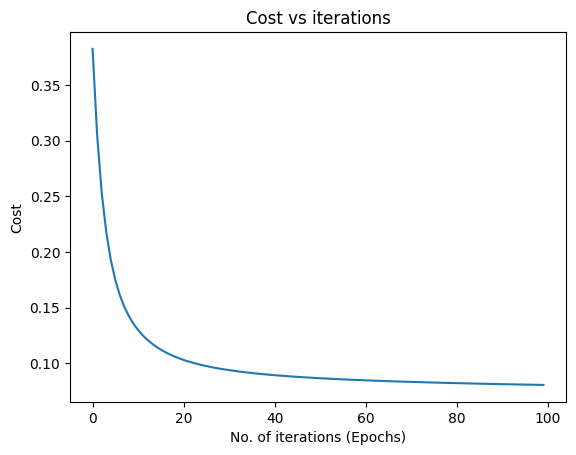

In [10]:
model.plot_cost()

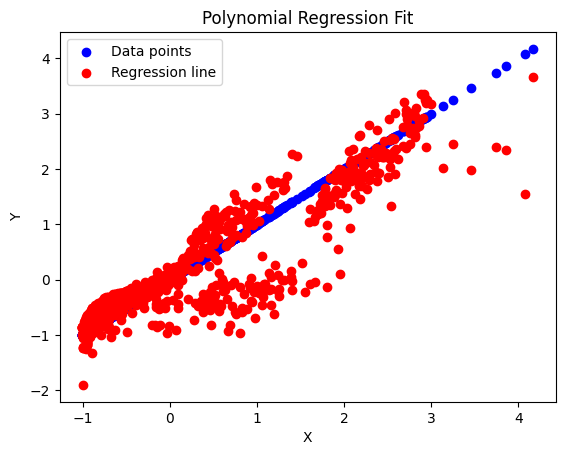

In [11]:
model.plot_regression_line(X, Y)

In [12]:
model.evaluation_metrics(Y , y_pred)

R2 Score: 0.8383351733564741
Mean Squared Error: 0.16154400091359805
Root Mean Squared Error: 0.4019253673427419
Mean Absolute Error: 0.26291137707549356


(np.float64(0.8383351733564741),
 np.float64(0.16154400091359805),
 np.float64(0.4019253673427419),
 np.float64(0.26291137707549356))